In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import pandas as pd
import os
import random

### Import Gray Images
##### List of Gray Images

In [3]:
images=os.listdir('gray_dataset_resized/')
width=71
height=87
max_pixel_value=255

#### Creating a matrix for storing an instance in each row  

In [4]:
dataset=np.ndarray(shape=((len(images),width*height)),dtype=np.float32)
dataset

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Storing each image instances 

In [5]:
for index in range(len(images)):
    img=mpimage.imread('gray_dataset_resized/'+images[index])
    dataset[index,:]=np.array(img,dtype=np.float32).flatten()


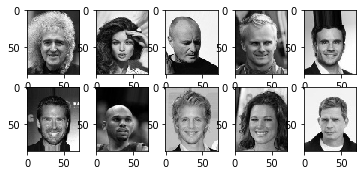

In [6]:
for index in range(10):
    plt.subplot(3,5,1+index)
    plt.imshow(dataset[index].reshape(height,width),cmap='gray')
plt.show()


### Calculate Mean Image 

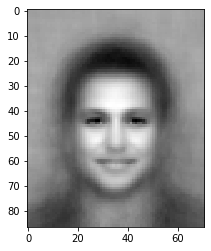

In [7]:
mean_image=np.zeros((1,height*width),dtype=np.float32)
for image in dataset:
    mean_image=np.add(mean_image,image)

mean_image=np.divide(mean_image,float(len(images)))

plt.imshow(mean_image.reshape(height,width),cmap='gray')
plt.show()

### Normalize The DataSet 

In [8]:
normal_dataset=np.ndarray(shape=(len(images),height*width),dtype=np.float32)

for index in range(len(images)):
    normal_dataset[index]=np.subtract(dataset[index],mean_image)
    
    

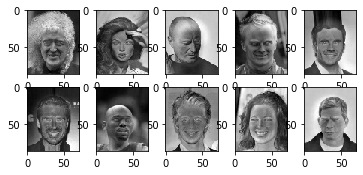

In [9]:
for index in range(10):
    plt.subplot(3,5,1+index)
    plt.imshow(normal_dataset[index].reshape(height,width),cmap='gray')
plt.show()

### Calculate Cov Matrix 

In [10]:
cov_matrix=np.cov(normal_dataset.reshape(width*height,len(images)))
cov_matrix.shape

(6177, 6177)

### Calculating EigenValues and EigenVectors 

In [11]:
eigenvalues,eigenvectors=np.linalg.eig(cov_matrix)

###### This Calculation run in 4 minutes an 42 second 

### Sorting The EigenValues with it`s EigenVectors 

In [56]:
eigen_tuple=[(eigenvalues[i],eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigenvectors.real

array([[ 4.35239372e-03, -5.94771252e-05, -2.14761327e-02, ...,
         7.13375862e-05,  2.04594492e-04,  1.93719759e-04],
       [-2.07007810e-02, -1.73840866e-03,  2.27715313e-02, ...,
         1.84113236e-05, -4.80053551e-05,  2.69298361e-05],
       [-1.24738083e-02, -2.62117410e-02, -9.36824592e-03, ...,
        -1.94227879e-05,  5.83438652e-05, -3.61475702e-05],
       ...,
       [-2.19854018e-02,  2.51608811e-02, -6.29134545e-03, ...,
         1.57918198e-03,  1.36155347e-03,  3.86012799e-04],
       [-3.35172579e-02, -1.09359306e-02,  5.52781849e-03, ...,
         9.04079815e-04, -2.77518967e-04,  9.79477345e-04],
       [ 1.98522942e-03, -3.25490256e-02,  5.99488872e-03, ...,
         2.69848740e-03,  3.48305766e-03, -8.43789398e-04]])

### Storing Eigen Vector 

In [76]:
eigen_faces=[]
for eivector in eigenvectors:
    eigen_faces.append(eivector.reshape(height,width))

In [105]:
def create_new_face(n_eigenfaces,weights):
    result=mean_image.reshape(height,width)
    for index in range(n_eigenfaces):
        weight=weights[index]-int(max_pixel_value/2)
        result=np.add(result,eigen_faces[index]*weight)
    return result    

## Testing 

#### Creating random weights 

In [106]:
number_of_new_faces=10
weights=[]
for i in range(number_of_new_faces):
    ls=[]
    for i in range(len(eigen_faces)):
        rand=random.randint(0,255)
        ls.append(rand)
    weights.append(ls)

#### New Face 

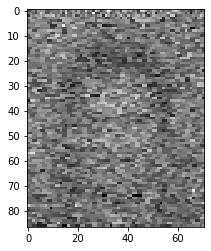

In [107]:
new_face=create_new_face(len(eigen_faces),weights[0])
plt.imshow(new_face.real,cmap='gray')
plt.show()

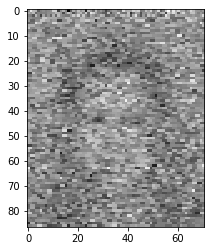

In [108]:
new_face=create_new_face(len(eigen_faces),weights[1])
plt.imshow(new_face.real,cmap='gray')
plt.show()

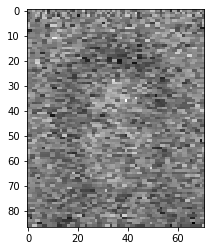

In [109]:
new_face=create_new_face(len(eigen_faces),weights[2])
plt.imshow(new_face.real,cmap='gray')
plt.show()

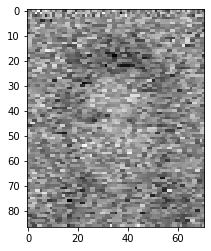

In [110]:
new_face=create_new_face(len(eigen_faces),weights[3])
plt.imshow(new_face.real,cmap='gray')
plt.show()

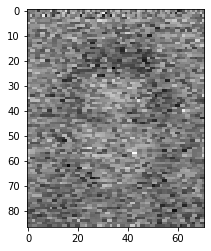

In [111]:
new_face=create_new_face(len(eigen_faces),weights[4])
plt.imshow(new_face.real,cmap='gray')
plt.show()